<a href="https://colab.research.google.com/github/RoseManoj/Salary-Prediction-Data-Science-Project/blob/main/SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/salary_prediction_data.csv')
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [ ]:
df_org=df.copy()

In [ ]:
df.isna().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [ ]:
df.dtypes

,0
Education,object
Experience,int64
Location,object
Job_Title,object
Age,int64
Gender,object
Salary,float64


In [ ]:
df['Gender'].unique()
df['Education'].unique()
df['Location'].unique()
df['Job_Title'].unique()

array(['Manager', 'Director', 'Analyst', 'Engineer'], dtype=object)

In [ ]:
#label encoded
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df['Education']=encoder.fit_transform(df['Education'])
df['Location']=encoder.fit_transform(df['Location'])
df['Job_Title']=encoder.fit_transform(df['Job_Title'])
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175
...,...,...,...,...,...,...,...
995,1,8,1,0,25,0,64683.389864
996,1,24,2,2,30,0,74468.205020
997,2,18,0,0,44,1,98207.026024
998,0,27,1,1,31,0,108544.922720


In [ ]:
x=df.iloc[:,:-1].values
x

array([[ 1,  8,  2,  3, 63,  1],
       [ 3, 11,  1,  1, 59,  1],
       [ 0, 28,  1,  3, 61,  0],
       ...,
       [ 2, 18,  0,  0, 44,  1],
       [ 0, 27,  1,  1, 31,  0],
       [ 1, 25,  2,  1, 41,  0]])

In [ ]:
y=df.iloc[:,-1].values
y

array([ 84620.05366452, 142591.25589431,  97800.25540414,  96834.6712815 ,
       132157.78617466, 156312.9362084 , 130567.64945545, 148707.74075901,
        95945.27542859, 133339.3896823 , 101164.09236529, 124251.98714687,
        55066.11435258, 124972.50876978, 126139.1367011 ,  81007.19945085,
        60693.92471393, 103386.07028993, 140042.1389185 ,  86048.11608072,
        73861.9929533 , 106145.0055121 , 142981.59047925,  96620.92938816,
        89426.94711719, 104762.3985202 , 101747.54077443,  68635.08828494,
        90550.4794241 ,  75559.24411373,  87433.4986452 ,  57615.23341761,
       126043.14343329,  73043.43575163, 134560.19300401,  95804.26144082,
        99694.53954355, 153930.93385163, 151123.33589342,  81462.71866944,
       106019.02039637, 142122.66726826,  66858.43105342,  82060.73292914,
       107935.40344896,  70251.76628382, 118799.44006116, 100369.02351604,
       100038.76802249, 164542.83698805,  95726.36718568,  96598.32495003,
        82628.14830429,  

In [ ]:
#train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 6), (300, 6), (700,), (300,))

In [ ]:
#linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([111583.11757919, 128112.45586326, 141254.08833964,  99913.74943622,
       116906.12711577,  81614.2597329 ,  70201.25744058, 137526.34539171,
       129170.80486538,  90561.56961593, 149833.27261176,  98394.72091113,
       124931.52301643,  98722.81247791,  93669.78559192,  97305.09386061,
       122391.96056956, 109165.42292266, 103218.03802398,  97346.16219406,
        83782.30815904, 138754.42791357, 121628.98955931, 101695.62032954,
        80304.79636658,  81996.89701579,  66548.52180862, 115908.20726878,
       125325.77220387, 123950.33879767,  97538.91212534, 121793.86653542,
        92162.46838742, 121059.63187229,  60241.48029793, 100910.69055134,
       111298.01538142, 104209.36601348,  87546.68005787, 105041.43015248,
        65748.88610681, 114433.734903  , 130149.08931672, 148980.41601748,
       130948.33860566,  86568.12842649, 103551.85805629, 117384.13108495,
       106618.42930371, 103159.93224115, 130406.65222824, 107292.60880173,
       103600.71104753, 1

In [ ]:
y_test

array([ 98276.76760253, 117342.18671454, 135962.90562632,  92184.8292578 ,
       133712.64269615,  84080.91886528,  68635.08828494, 139034.76260984,
       154677.29682143, 103473.04500041, 148185.15341038, 107652.04715249,
       127318.7778506 ,  84841.86724581, 119772.32054397, 106028.63629377,
       146305.24025865, 100622.23740615, 126139.1367011 ,  58008.87061573,
        57615.23341761, 149741.55027515, 124594.39965062,  83967.79917322,
        92373.80193359,  87266.49791623,  70251.76628382, 119140.33843647,
       107515.28949272, 142591.25589431, 117630.38957755, 143623.63037382,
        88826.78449165, 107141.4742482 ,  62915.44568326, 102655.89286955,
       142528.77765517,  85339.36814956,  66983.27059355,  96929.31513159,
        65598.43408128,  74468.20501985, 106536.06863752, 145659.37051637,
       134639.65075526,  94528.34132347, 123441.29098796, 145434.53439583,
        97925.3401858 ,  60167.65498087, 131229.48793727, 105457.61391306,
       133794.19981203, 1

In [ ]:
#performance meseaures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
print("r2_score: ",r2_score(y_test,y_pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred))
print("mean_squared_error: ",mean_squared_error(y_test,y_pred))
print("root_mean_squared_error: ",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score:  0.5881217150438567
mean_absolute_error:  14736.67943470397
mean_squared_error:  349695418.23554194
root_mean_squared_error:  18700.144872046898


In [ ]:
# to see the diff
res=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Diff':y_pred-y_test})
res

,Actual,Predicted,Diff
0,98276.767603,111583.117579,13306.349977
1,117342.186715,128112.455863,10770.269149
2,135962.905626,141254.088340,5291.182713
3,92184.829258,99913.749436,7728.920178
4,133712.642696,116906.127116,-16806.515580
...,...,...,...
295,113966.506543,112997.900688,-968.605855
296,108544.922720,94187.238680,-14357.684040
297,54908.314856,87260.957194,32352.642338
298,157137.804861,144507.192410,-12630.612450


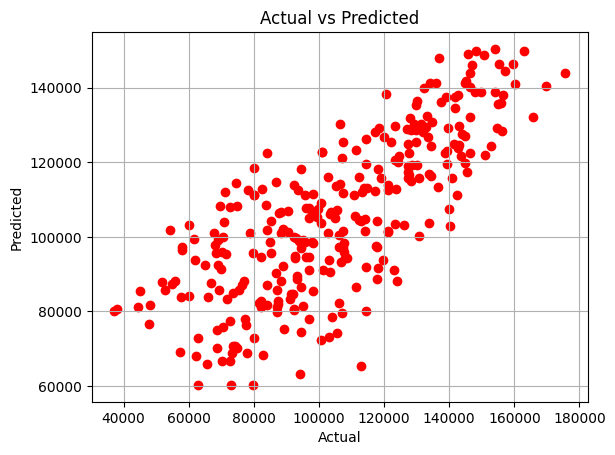

In [ ]:
#to visualize
import matplotlib.pyplot as plt

plt.title("Actual vs Predicted")
plt.scatter(y_test,y_pred,color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

----
----

## KNN REG

---
---

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn=knn.predict(x_test)
y_pred

array([111583.11757919, 128112.45586326, 141254.08833964,  99913.74943622,
       116906.12711577,  81614.2597329 ,  70201.25744058, 137526.34539171,
       129170.80486538,  90561.56961593, 149833.27261176,  98394.72091113,
       124931.52301643,  98722.81247791,  93669.78559192,  97305.09386061,
       122391.96056956, 109165.42292266, 103218.03802398,  97346.16219406,
        83782.30815904, 138754.42791357, 121628.98955931, 101695.62032954,
        80304.79636658,  81996.89701579,  66548.52180862, 115908.20726878,
       125325.77220387, 123950.33879767,  97538.91212534, 121793.86653542,
        92162.46838742, 121059.63187229,  60241.48029793, 100910.69055134,
       111298.01538142, 104209.36601348,  87546.68005787, 105041.43015248,
        65748.88610681, 114433.734903  , 130149.08931672, 148980.41601748,
       130948.33860566,  86568.12842649, 103551.85805629, 117384.13108495,
       106618.42930371, 103159.93224115, 130406.65222824, 107292.60880173,
       103600.71104753, 1

In [ ]:
#performance meseaures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
print("r2_score: ",r2_score(y_test,y_pred_knn))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred_knn))
print("mean_squared_error: ",mean_squared_error(y_test,y_pred_knn))
print("root_mean_squared_error: ",math.sqrt(mean_squared_error(y_test,y_pred_knn)))

r2_score:  0.3672585148779992
mean_absolute_error:  18474.493512393914
mean_squared_error:  537214042.0033954
root_mean_squared_error:  23177.878289511216


---
---

## **RANDOM FOREST**

---
---

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([ 95406.09695771, 120798.24351911, 144014.48438071,  77326.52744999,
       123743.82032518,  79451.04659219,  82379.37597789, 148153.63005596,
       129686.72473395,  96791.5429811 , 147314.04169223, 118330.35910534,
       124391.54434051,  68076.84457304,  99326.08446573,  89867.84665464,
       131553.30215959, 105304.9839276 , 134581.54745532,  58370.53561788,
        55354.05969269, 125482.76981135, 124638.40289633, 103145.54775563,
        94363.63567534,  88728.30296942,  58204.93856049, 119652.73572292,
       118476.02828423, 142483.24283257,  96328.59124991, 137651.17566275,
        87861.84019   , 120335.13374323,  53409.65530469, 107942.85354928,
       128202.38674999,  92104.65915183,  69415.74339977,  98689.43804175,
        75505.64446776,  92137.79651535, 129400.45980652, 154245.32252151,
       128719.65294022,  88274.40685331, 135115.48245677, 135092.79465567,
       108909.40390215,  74725.41450853, 129693.50191603,  87695.82297008,
       128010.23593123, 1

In [ ]:
#performance meseaures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math
print("r2_score: ",r2_score(y_test,y_pred_rf))
print("mean_absolute_error: ",mean_absolute_error(y_test,y_pred_rf))
print("mean_squared_error: ",mean_squared_error(y_test,y_pred_rf))
print("root_mean_squared_error: ",math.sqrt(mean_squared_error(y_test,y_pred_rf)))

r2_score:  0.8537690566681
mean_absolute_error:  8939.203083383043
mean_squared_error:  124153889.03756267
root_mean_squared_error:  11142.436404914442


R² = 1.0 → perfect model

R² = 0 → model predicts no better than average

R² < 0 → model is worse than guessing average

In [ ]:
results=pd.DataFrame({
    'model':['lr','knn','rf'],

    'r2_score':[r2_score(y_test,y_pred),r2_score(y_test,y_pred_knn),r2_score(y_test,y_pred_rf)],
    'mean_absolute_error':[mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_pred_knn),mean_absolute_error(y_test,y_pred_rf)],
    'mean_squared_error':[mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_pred_knn),mean_squared_error(y_test,y_pred_rf)],
    'root_mean_squared_error':[math.sqrt(mean_squared_error(y_test,y_pred)),math.sqrt(mean_squared_error(y_test,y_pred_knn)),math.sqrt(mean_squared_error(y_test,y_pred_rf))]
})
results


,model,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,lr,0.588122,14736.679435,3.496954e+08,18700.144872
1,knn,0.367259,18474.493512,5.372140e+08,23177.878290
2,rf,0.853769,8939.203083,1.241539e+08,11142.436405


In [ ]:
def highlight_best(s, is_max=True):
    best = s.max() if is_max else s.min()
    return ['background-color: lightgreen' if val == best else '' for val in s]

results.style\
    .apply(highlight_best, is_max=False, subset=['mean_absolute_error'])\
    .apply(highlight_best, is_max=False, subset=['root_mean_squared_error'])\
    .apply(highlight_best, is_max=False, subset=['mean_squared_error'])\
    .apply(highlight_best, is_max=True, subset=['r2_score'])

,model,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,lr,0.588122,14736.679435,349695418.235542,18700.144872
1,knn,0.367259,18474.493512,537214042.003395,23177.878290
2,rf,0.853769,8939.203083,124153889.037563,11142.436405


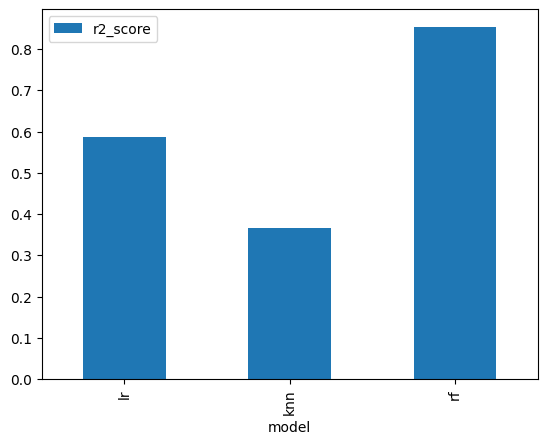

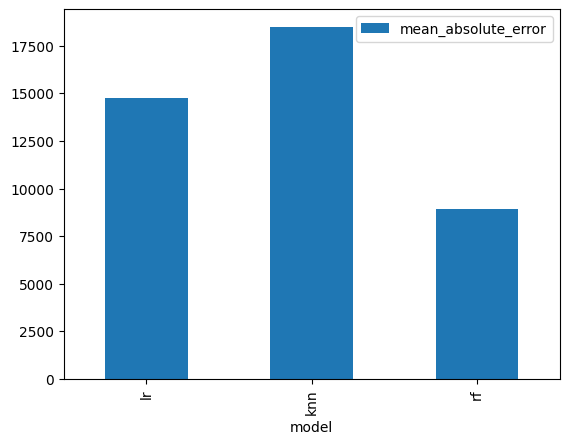

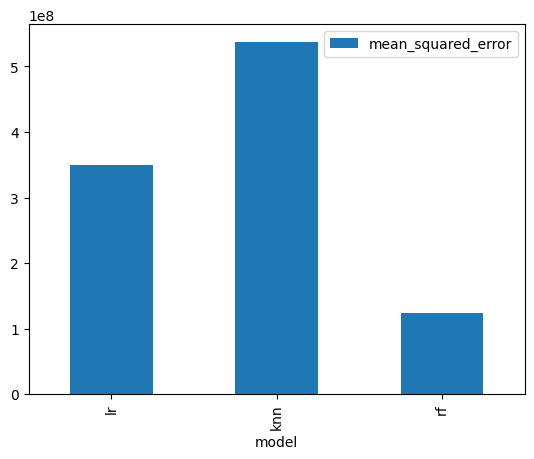

In [ ]:
import matplotlib.pyplot as plt
results.set_index('model')[['r2_score']].plot(kind='bar')
results.set_index('model')[['mean_absolute_error']].plot(kind='bar')
results.set_index('model')[['mean_squared_error']].plot(kind='bar')
plt.show()

<Axes: ylabel='model'>

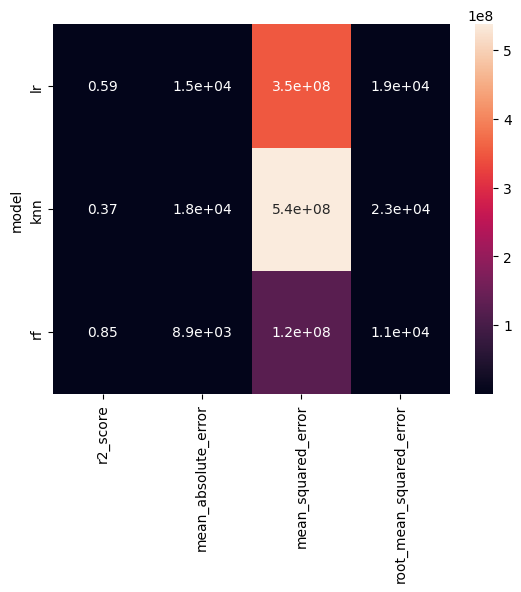

In [ ]:
import seaborn as sns
sns.heatmap(results.set_index('model'),annot=True)

---



```

```

## ***classification***

---

In [ ]:
df['Salary_class']=pd.cut(df['Salary'],bins=[0,50000,100000,float('inf')],labels=['low','meduim','high'])
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary,Salary_class
0,1,8,2,3,63,1,84620.053665,meduim
1,3,11,1,1,59,1,142591.255894,high
2,0,28,1,3,61,0,97800.255404,meduim
3,1,29,0,1,45,1,96834.671282,meduim
4,3,25,2,0,26,0,132157.786175,high
...,...,...,...,...,...,...,...,...
995,1,8,1,0,25,0,64683.389864,meduim
996,1,24,2,2,30,0,74468.205020,meduim
997,2,18,0,0,44,1,98207.026024,meduim
998,0,27,1,1,31,0,108544.922720,high


In [ ]:
x=df.iloc[:,:-2].values
x

array([[ 1,  8,  2,  3, 63,  1],
       [ 3, 11,  1,  1, 59,  1],
       [ 0, 28,  1,  3, 61,  0],
       ...,
       [ 2, 18,  0,  0, 44,  1],
       [ 0, 27,  1,  1, 31,  0],
       [ 1, 25,  2,  1, 41,  0]])

In [ ]:
y=df.iloc[:,-1].values
y

['meduim', 'high', 'meduim', 'meduim', 'high', ..., 'meduim', 'meduim', 'meduim', 'high', 'meduim']
Length: 1000
Categories (3, object): ['low' < 'meduim' < 'high']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((700, 6), (300, 6), (700,), (300,))

---
---

## **KNN CLASSIFICTION**

---
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array(['high', 'high', 'high', 'meduim', 'high', 'meduim', 'meduim',
       'high', 'high', 'meduim', 'high', 'high', 'high', 'high', 'meduim',
       'high', 'high', 'meduim', 'high', 'meduim', 'meduim', 'high',
       'high', 'meduim', 'meduim', 'meduim', 'high', 'high', 'high',
       'high', 'high', 'high', 'meduim', 'high', 'meduim', 'high', 'high',
       'high', 'meduim', 'meduim', 'meduim', 'high', 'meduim', 'high',
       'high', 'meduim', 'high', 'high', 'high', 'meduim', 'meduim',
       'high', 'high', 'meduim', 'meduim', 'meduim', 'high', 'meduim',
       'high', 'meduim', 'high', 'high', 'meduim', 'high', 'meduim',
       'high', 'meduim', 'high', 'meduim', 'high', 'high', 'high',
       'meduim', 'meduim', 'meduim', 'meduim', 'meduim', 'high', 'high',
       'meduim', 'meduim', 'meduim', 'low', 'high', 'meduim', 'meduim',
       'meduim', 'meduim', 'high', 'high', 'meduim', 'meduim', 'high',
       'meduim', 'meduim', 'high', 'meduim', 'high', 'high', 'meduim',
       'h

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print(accuracy_knn)
precision_score_knn=precision_score(y_test,y_pred_knn,average='weighted')*100
print(precision_score_knn)
recall_score_knn=recall_score(y_test,y_pred_knn,average='weighted')*100
print(recall_score_knn)
f1_score_knn=f1_score(y_test,y_pred_knn,average='weighted')*100
print(f1_score_knn)
print(classification_report(y_test,y_pred_knn))



68.33333333333333
67.84444444444443
68.33333333333333
68.08739837398373
              precision    recall  f1-score   support

        high       0.73      0.74      0.74       163
         low       0.00      0.00      0.00         6
      meduim       0.64      0.64      0.64       131

    accuracy                           0.68       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.68      0.68      0.68       300



---
---

## **SVC**

---
---

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svc=svc.predict(x_test)
y_pred_svc

array(['high', 'high', 'high', 'high', 'high', 'meduim', 'meduim', 'high',
       'high', 'high', 'high', 'meduim', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'meduim', 'meduim', 'high', 'high',
       'meduim', 'high', 'meduim', 'meduim', 'high', 'high', 'high',
       'high', 'high', 'meduim', 'high', 'meduim', 'meduim', 'high',
       'high', 'meduim', 'high', 'meduim', 'high', 'high', 'high', 'high',
       'meduim', 'meduim', 'high', 'meduim', 'high', 'high', 'high',
       'meduim', 'high', 'high', 'high', 'high', 'meduim', 'meduim',
       'meduim', 'high', 'high', 'meduim', 'high', 'high', 'high', 'high',
       'high', 'meduim', 'high', 'high', 'meduim', 'high', 'high',
       'meduim', 'meduim', 'meduim', 'high', 'high', 'high', 'meduim',
       'meduim', 'meduim', 'meduim', 'high', 'meduim', 'meduim', 'high',
       'high', 'high', 'meduim', 'high', 'high', 'high', 'meduim', 'high',
       'meduim', 'high', 'high', 'meduim', 'high', 'high', 'high', 'high'

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy_svc=accuracy_score(y_test,y_pred_svc)*100
print(accuracy_svc)
precision_score_svc=precision_score(y_test,y_pred_svc,average='weighted')*100
print(precision_score_svc)
recall_score_svc=recall_score(y_test,y_pred_svc,average='weighted')*100
print(recall_score_svc)
f1_score_svc=f1_score(y_test,y_pred_svc,average='weighted')*100
print(f1_score_svc)
print(classification_report(y_test,y_pred_svc))


71.33333333333334
70.05854354279649
71.33333333333334
69.8058519083
              precision    recall  f1-score   support

        high       0.71      0.87      0.78       163
         low       0.00      0.00      0.00         6
      meduim       0.72      0.56      0.63       131

    accuracy                           0.71       300
   macro avg       0.48      0.47      0.47       300
weighted avg       0.70      0.71      0.70       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

---
---

## **LOGICAL REGRESSION**

---
---

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log = log.predict(x_test)
display(y_pred_log)

array(['high', 'high', 'high', 'meduim', 'high', 'meduim', 'meduim',
       'high', 'high', 'meduim', 'high', 'meduim', 'high', 'high',
       'meduim', 'meduim', 'high', 'high', 'high', 'meduim', 'meduim',
       'high', 'high', 'high', 'meduim', 'meduim', 'meduim', 'high',
       'high', 'high', 'meduim', 'high', 'meduim', 'high', 'meduim',
       'high', 'high', 'high', 'meduim', 'high', 'meduim', 'high', 'high',
       'high', 'high', 'meduim', 'high', 'high', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'meduim', 'meduim',
       'meduim', 'high', 'high', 'meduim', 'high', 'high', 'high', 'high',
       'high', 'meduim', 'meduim', 'high', 'meduim', 'high', 'high',
       'meduim', 'meduim', 'meduim', 'high', 'high', 'high', 'meduim',
       'meduim', 'meduim', 'meduim', 'meduim', 'meduim', 'meduim', 'high',
       'high', 'meduim', 'meduim', 'meduim', 'meduim', 'high', 'meduim',
       'high', 'meduim', 'high', 'meduim', 'meduim', 'meduim', 'high'

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy_log=accuracy_score(y_test,y_pred_log)*100
print(accuracy_log)
precision_score_log=precision_score(y_test,y_pred_log,average='weighted')*100
print(precision_score_log)
recall_score_log=recall_score(y_test,y_pred_log,average='weighted')*100
print(recall_score_log)
f1_score_log=f1_score(y_test,y_pred_log,average='weighted')*100
print(f1_score_log)
print(classification_report(y_test,y_pred_log))

76.0
74.42603550295857
76.0
75.19879518072288
              precision    recall  f1-score   support

        high       0.79      0.82      0.80       163
         low       0.00      0.00      0.00         6
      meduim       0.73      0.73      0.73       131

    accuracy                           0.76       300
   macro avg       0.50      0.51      0.51       300
weighted avg       0.74      0.76      0.75       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
#results
accuracy_results=pd.DataFrame({
    'model':['knn','svc','log'],
    'accuracy':[accuracy_knn,accuracy_svc,accuracy_log],
})
accuracy_results

,model,accuracy
0,knn,68.333333
1,svc,71.333333
2,log,76.000000


In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

accuracy_results.style.apply(highlight_max, subset=['accuracy'])

,model,accuracy
0,knn,68.333333
1,svc,71.333333
2,log,76.000000


In [ ]:
#comparision

comparision=pd.DataFrame({
    'model_type':['Classification','Classification','Classification'],
    'model':['knn','svc','log'],
    'accuracy':[accuracy_knn,accuracy_svc,accuracy_log],
    'precision_score':[precision_score_knn,precision_score_svc,precision_score_log],
    'recall_score':[recall_score_knn,recall_score_svc,recall_score_log],
    'f1_score':[f1_score_knn,f1_score_svc,f1_score_log],


})
def highlight_best(s, is_max=True):
    best = s.max() if is_max else s.min()
    return ['background-color: lightgreen' if val == best else '' for val in s]
comparision.style\
    .apply(highlight_best, is_max=False, subset=['precision_score'])\
    .apply(highlight_best, is_max=False, subset=['recall_score'])\
    .apply(highlight_best, is_max=False, subset=['f1_score'])\
    .apply(highlight_best, is_max=True, subset=['accuracy'])

,model_type,model,accuracy,precision_score,recall_score,f1_score
0,Classification,knn,68.333333,67.844444,68.333333,68.087398
1,Classification,svc,71.333333,70.058544,71.333333,69.805852
2,Classification,log,76.000000,74.426036,76.000000,75.198795


In [ ]:
class_results=pd.DataFrame({
    'model':['knn','svc','log'],
    'accuracy':[accuracy_knn,accuracy_svc,accuracy_log],
    'precision_score':[precision_score_knn,precision_score_svc,precision_score_log],
    'recall_score':[recall_score_knn,recall_score_svc,recall_score_log],
    'f1_score':[f1_score_knn,f1_score_svc,f1_score_log]
})
class_results

,model,accuracy,precision_score,recall_score,f1_score
0,knn,68.333333,67.844444,68.333333,68.087398
1,svc,71.333333,70.058544,71.333333,69.805852
2,log,76.000000,74.426036,76.000000,75.198795


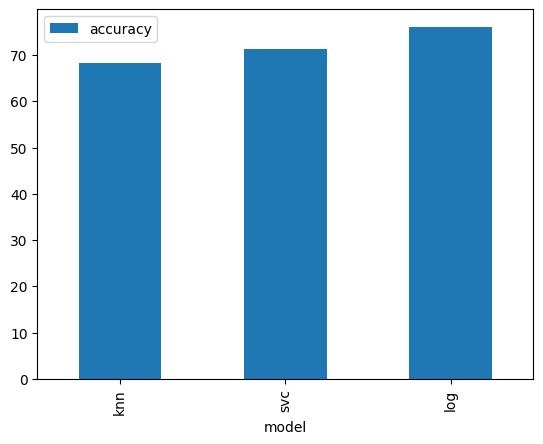

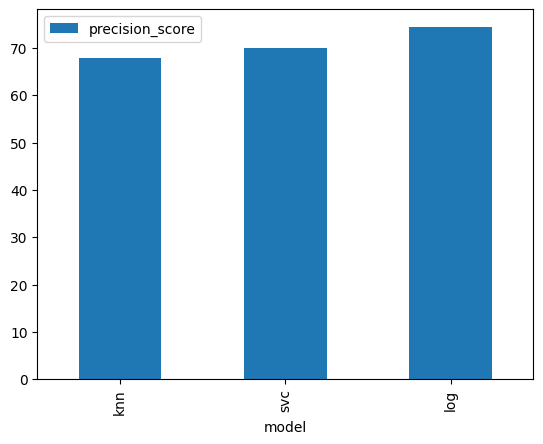

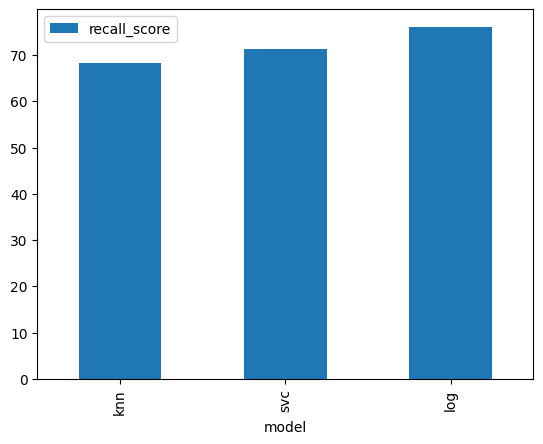

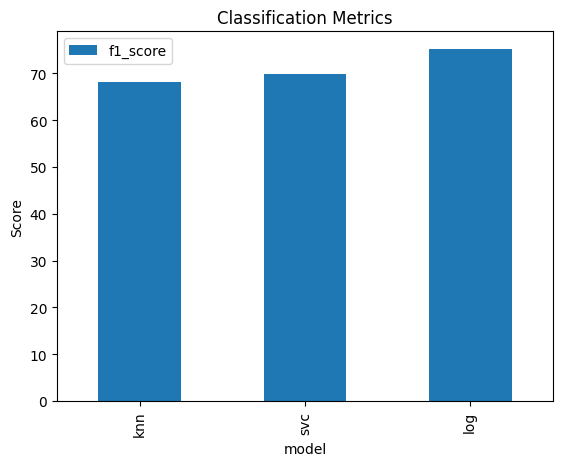

In [ ]:
class_results.set_index('model')[['accuracy']].plot(kind='bar')
class_results.set_index('model')[['precision_score']].plot(kind='bar')
class_results.set_index('model')[['recall_score']].plot(kind='bar')
class_results.set_index('model')[['f1_score']].plot(kind='bar')
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.show()

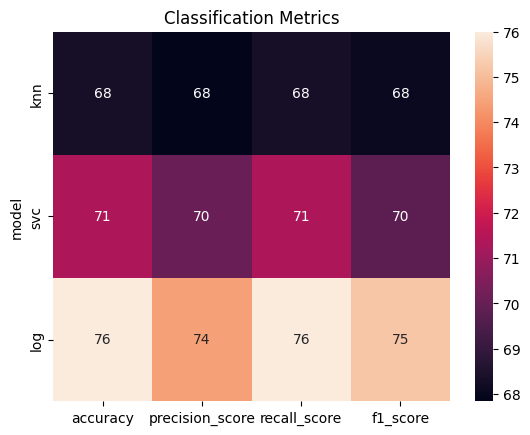

In [ ]:
import seaborn as sns

sns.heatmap(class_results.set_index('model'),annot=True)
plt.title('Classification Metrics')
plt.show()

## ***classification***

In [ ]:
#comparision

comparision=pd.DataFrame({
    'model_type':['Classification','Classification','Classification'],
    'model':['knn','svc','log'],
    'accuracy':[accuracy_knn,accuracy_svc,accuracy_log],
    'precision_score':[precision_score_knn,precision_score_svc,precision_score_log],
    'recall_score':[recall_score_knn,recall_score_svc,recall_score_log],
    'f1_score':[f1_score_knn,f1_score_svc,f1_score_log],


})
def highlight_best(s, is_max=True):
    best = s.max() if is_max else s.min()
    return ['background-color: lightgreen' if val == best else '' for val in s]
comparision.style\
    .apply(highlight_best, is_max=False, subset=['precision_score'])\
    .apply(highlight_best, is_max=False, subset=['recall_score'])\
    .apply(highlight_best, is_max=False, subset=['f1_score'])\
    .apply(highlight_best, is_max=True, subset=['accuracy'])

,model_type,model,accuracy,precision_score,recall_score,f1_score
0,Classification,knn,68.333333,67.844444,68.333333,68.087398
1,Classification,svc,71.333333,70.058544,71.333333,69.805852
2,Classification,log,76.000000,74.426036,76.000000,75.198795


 ***Regression***

In [ ]:
def highlight_best(s, is_max=True):
    best = s.max() if is_max else s.min()
    return ['background-color: lightgreen' if val == best else '' for val in s]

results.style\
    .apply(highlight_best, is_max=False, subset=['mean_absolute_error'])\
    .apply(highlight_best, is_max=False, subset=['root_mean_squared_error'])\
    .apply(highlight_best, is_max=False, subset=['mean_squared_error'])\
    .apply(highlight_best, is_max=True, subset=['r2_score'])

,model,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,lr,0.588122,14736.679435,349695418.235542,18700.144872
1,knn,0.367259,18474.493512,537214042.003395,23177.878290
2,rf,0.853769,8939.203083,124153889.037563,11142.436405
